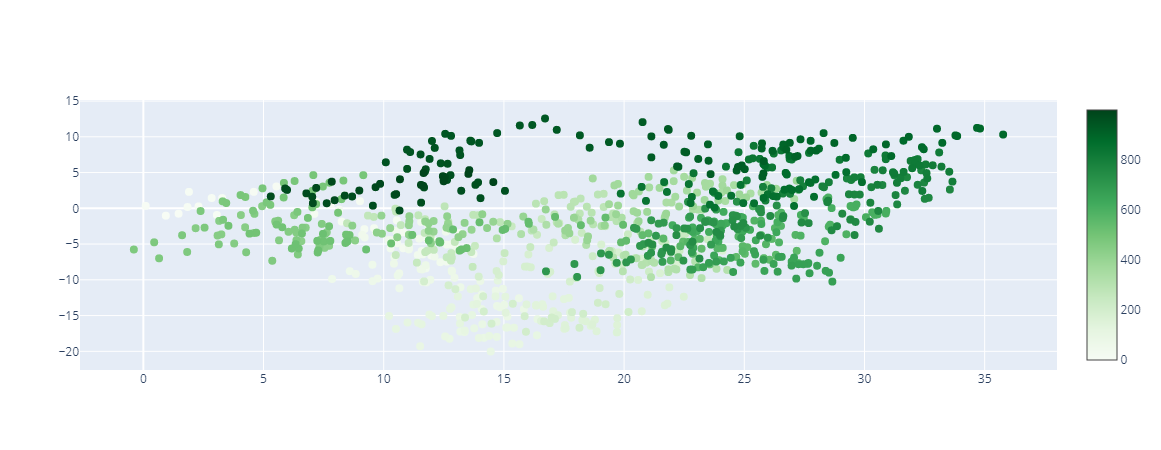

In [1]:
import plotly.graph_objects as go
import numpy as np

l = 1000
x_steps = np.random.choice([-1, 1], size=l) + 0.2 * np.random.randn(l) # l steps
y_steps = np.random.choice([-1, 1], size=l) + 0.2 * np.random.randn(l) # l steps
x_position = np.cumsum(x_steps) # integrate the position by summing steps values
y_position = np.cumsum(y_steps) # integrate the position by summing steps values

fig = go.Figure(data=go.Scatter(
    x=x_position,
    y=y_position,
    mode='markers',
    name='Random Walk',
    marker=dict(
        color=np.arange(l),
        size=8,
        colorscale='Greens',
        showscale=True
    )
))

fig.show()

## Random walk and diffusion  
在下面的两个图表中，我们展示了随机游动和扩散之间的联系。我们计算了大量的N个随机游动，以一小滴化学物质中的分子为例。所有轨迹均从0点开始，一段时间后，点的空间分布为高斯分布。此外，到原点的平均距离也随着(√t)增长

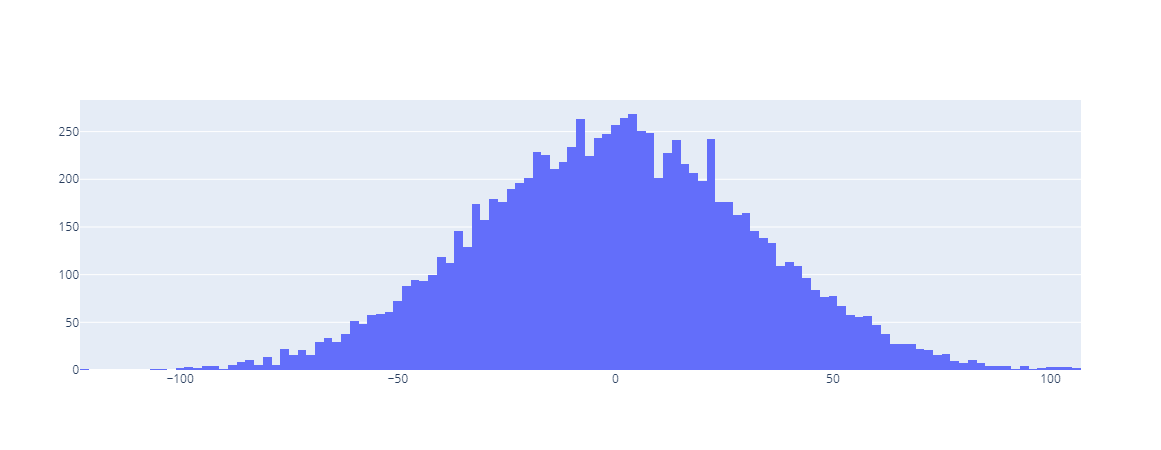

In [2]:
import plotly.graph_objects as go
import numpy as np

l = 1000
N = 10000
steps = np.random.choice([-1, 1], size=(N, l)) + 0.05 * np.random.standard_normal((N, l)) # l steps
position = np.cumsum(steps, axis=1) # integrate all positions by summing steps values along time axis

fig = go.Figure(data=go.Histogram(x=position[:, -1])) # positions at final time step
fig.show()

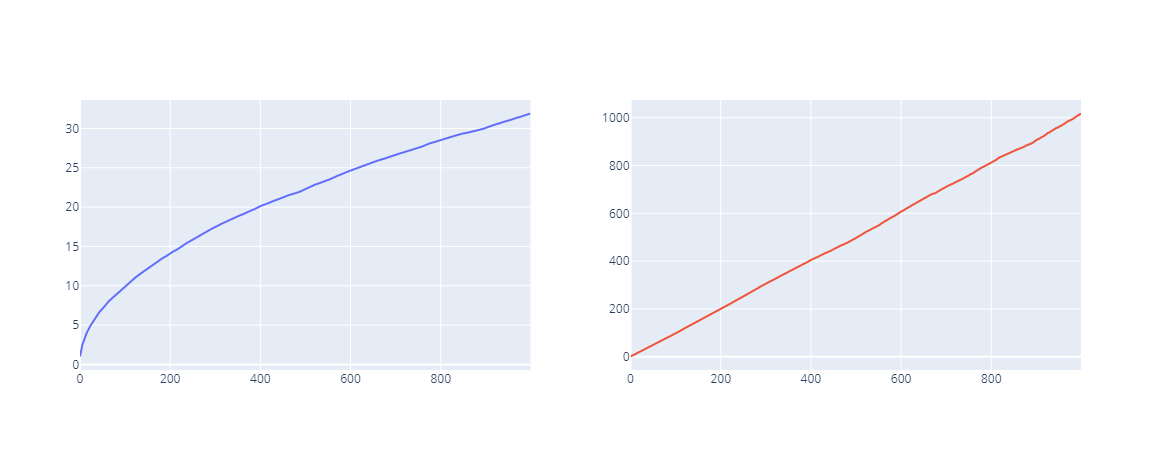

In [3]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

l = 1000
N = 10000
t = np.arange(l)
steps = np.random.choice([-1, 1], size=(N, l)) + 0.05 * np.random.standard_normal((N, l)) # l steps
position = np.cumsum(steps, axis=1) # integrate the position by summing steps values
average_distance = np.std(position, axis=0) # average distance

fig = make_subplots(1, 2)
fig.add_trace(go.Scatter(x=t, y=average_distance, name='mean distance'), 1, 1)
fig.add_trace(go.Scatter(x=t, y=average_distance**2, name='mean squared distance'), 1, 2)
fig.update_xaxes(title_text='$t$')
fig.update_yaxes(title_text='$l$', col=1)
fig.update_yaxes(title_text='$l^2$', col=2)
fig.update_layout(showlegend=False)
fig.show()

# Advanced Tip

We can formally think of a 1D random walk as a point jumping along the integer number line. Let Zi be a random variable that takes on the values +1 and -1. Let this random variable represent the steps we take in the random walk in 1D (where +1 means right and -1 means left). Also, as with the above visualizations, let us assume that the probability of moving left and right is just 1/2. Then, consider the sum
$$S_{n}=\sum_{i=0}^{n} Z_{i}$$ 

where S_n represents the point that the random walk ends up on after n steps have been taken.

To find the expected value of Sn, we can compute it directly. Since each Zi is independent, we have
$$
\mathbb{E}\left(S_{n}\right)=\sum_{i=0}^{n} \mathbb{E}\left(Z_{i}\right)
$$
but since Zi takes on the values +1 and -1 then
$$
\mathbb{E}\left(Z_{i}\right)=1 \cdot P\left(Z_{i}=1\right)+-1 \cdot P\left(Z_{i}=-1\right)=\frac{1}{2}-\frac{1}{2}=0
$$
Therefore, we expect our random walk to hover around 0 regardless of how many steps we take in our walk.